# Homework 3

The task is to create a search engine on the most read books on [goodreads.com](https://www.goodreads.com/). The dataset is built by taking all the books from the first 300 pages on the most read ranking list. Both the *vocabulary* assigning an id to each word in the corpus, the *inverted and tfidf index* are stored on disk for efficiency purposes and loaded in memory upon creation of a search engine object.

## GoodReads Search Engine

The dataset has been created downloading the first 300 pages of books from the GoodReads.com most read books list, multithreading has been used to speed up the process. Please notice that:
- the code in the cells below assumes the necessary file are all present, if `dataset.tsv` has not been create please run the script `build_dataset.py`.
- if vocabulary or indexes are missing they will be generated upon creation of a SearchEngine object.

In [31]:
from functions import *

se = SearchEngine()

### query() function

The functions takes 3 paramenters:
- a string representing the user query
- the type of query, one of `["and", "cosine", "rating", "title"]`
- the number of results to visualize

Default values are AND query and 10 results.

### AND query
This is the basic query that will also serve as the baseline for the other options, the results are the books containing each individual word in the query sorted according to their order in the dataset which corresponds to their order on the GoodReads ranking.

In [30]:
se.query("harry potter", type_='and')

,bookTitle,Plot,Url
0,Harry Potter and the Order of the Phoenix by J...,There is a door at the end of a silent corrido...,https://www.goodreads.com/book/show/2.Harry_Po...
10497,Harry Potter Schoolbooks Box Set: Two Classic ...,There is an alternate cover edition for this I...,https://www.goodreads.com/book/show/2002.Harry...
25474,"Queste (Septimus Heap, #4) by Angie Sage",The fourth book in the internationally bestsel...,https://www.goodreads.com/book/show/1375896.Qu...
14345,Fisher's Autism Trilogy by Paul C. Nelson,This is the entire Fisher Stevens Autism Trilo...,https://www.goodreads.com/book/show/33152019-f...
1290,Harry Potter and the Cursed Child: Parts One a...,Based on an original new story by J.K. Rowling...,https://www.goodreads.com/book/show/29056083-h...
21388,The Lost Witch by Chandelle LaVaun,I thought magic was make believe...but I was ...,https://www.goodreads.com/book/show/38714650-t...
16781,Mieradome by Kate O'Hegarty,Mieradome pulls the reader into a unique fanta...,https://www.goodreads.com/book/show/7280472-mi...
7182,Fantastic Beasts - The Crimes of Grindelwald: ...,At the end of Fantastic Beasts and Where to Fi...,https://www.goodreads.com/book/show/39330961-f...
1168,Fantastic Beasts and Where to Find Them by New...,An approved textbook at Hogwarts School of Wit...,https://www.goodreads.com/book/show/41899.Fant...
24341,Masochist (Swann Series #4) by Ryan Schow,There's nothing quite as devastating as believ...,https://www.goodreads.com/book/show/33199662-m...


### Cosine similarity query

Here the results are obtain by sorting the results of an **AND query** according to the cosine similarity with the user query string.

In [23]:
se.query("harry potter", type_='cosine')

,bookTitle,Plot,Url,Similarity
6380,"The Harry Potter trilogy (Harry Potter, #1-3) ...",This box set collects hard cover editions Harr...,https://www.goodreads.com/book/show/2337379.Th...,0.90
6760,"Harry Potter Boxed Set, Books 1-5 by J.K. Rowling",Box Set containing Harry Potter and the Sorcer...,https://www.goodreads.com/book/show/8.Harry_Po...,0.89
1580,The Harry Potter Collection 1-4 by J.K. Rowling,"The exciting tales of Harry Potter, the young ...",https://www.goodreads.com/book/show/99298.The_...,0.77
406,"Harry Potter Series Box Set (Harry Potter, #1-...","Over 4000 pages of Harry Potter and his world,...",https://www.goodreads.com/book/show/862041.Har...,0.74
1290,Harry Potter and the Cursed Child: Parts One a...,Based on an original new story by J.K. Rowling...,https://www.goodreads.com/book/show/29056083-h...,0.70
2423,Harry Potter and the Methods of Rationality by...,Harry Potter and the Methods of Rationality is...,https://www.goodreads.com/book/show/10016013-h...,0.56
125,Harry Potter and the Chamber of Secrets by J.K...,Ever since Harry Potter had come home for the ...,https://www.goodreads.com/book/show/15881.Harr...,0.52
7130,Harry Potter: Film Wizardry by Brian Sibley,Harry Potter: Film Wizardry gives readers a fr...,https://www.goodreads.com/book/show/7952502-ha...,0.51
16586,"Harry Potter: The Prequel (Harry Potter, #0.5)...",The Harry Potter Prequel is an 800-word story ...,https://www.goodreads.com/book/show/8933944-ha...,0.49
2247,"Harry Potter Collection (Harry Potter, #1-6) b...","Six years of magic, adventure, and mystery mak...",https://www.goodreads.com/book/show/10.Harry_P...,0.45


In [24]:
se.query("harry potter", type_='title')

,bookTitle,Plot,Url,Similarity
12959,Harry Potter: A History of Magic by British Li...,Harry Potter: A History of Magic is the offici...,https://www.goodreads.com/book/show/35613533-h...,0.72
1290,Harry Potter and the Cursed Child: Parts One a...,Based on an original new story by J.K. Rowling...,https://www.goodreads.com/book/show/29056083-h...,0.61
1580,The Harry Potter Collection 1-4 by J.K. Rowling,"The exciting tales of Harry Potter, the young ...",https://www.goodreads.com/book/show/99298.The_...,0.59
6380,"The Harry Potter trilogy (Harry Potter, #1-3) ...",This box set collects hard cover editions Harr...,https://www.goodreads.com/book/show/2337379.Th...,0.59
2247,"Harry Potter Collection (Harry Potter, #1-6) b...","Six years of magic, adventure, and mystery mak...",https://www.goodreads.com/book/show/10.Harry_P...,0.58
104,Harry Potter and the Half-Blood Prince by J.K....,The war against Voldemort is not going well; e...,https://www.goodreads.com/book/show/1.Harry_Po...,0.57
125,Harry Potter and the Chamber of Secrets by J.K...,Ever since Harry Potter had come home for the ...,https://www.goodreads.com/book/show/15881.Harr...,0.57
6760,"Harry Potter Boxed Set, Books 1-5 by J.K. Rowling",Box Set containing Harry Potter and the Sorcer...,https://www.goodreads.com/book/show/8.Harry_Po...,0.56
30,Harry Potter and the Sorcerer's Stone by J.K. ...,Harry Potter's life is miserable. His parents ...,https://www.goodreads.com/book/show/3.Harry_Po...,0.55
0,Harry Potter and the Order of the Phoenix by J...,There is a door at the end of a silent corrido...,https://www.goodreads.com/book/show/2.Harry_Po...,0.55


### Rating query

If we're interested in sorting the results based on their popularity among users we can run **rating query**, which is performed by taking the results of an **AND query** sorted according to their aggregate rating value.


`aggregate rating value = average rating * number of votes`

In [25]:
se.query("harry potter", type_='rating')

,bookTitle,Plot,Url,Similarity
30,Harry Potter and the Sorcerer's Stone by J.K. ...,Harry Potter's life is miserable. His parents ...,https://www.goodreads.com/book/show/3.Harry_Po...,1.00
69,Harry Potter and the Deathly Hallows by J.K. R...,Harry Potter is leaving Privet Drive for the l...,https://www.goodreads.com/book/show/136251.Har...,0.41
90,Harry Potter and the Prisoner of Azkaban by J....,"For twelve long years, the dread fortress of A...",https://www.goodreads.com/book/show/5.Harry_Po...,0.41
125,Harry Potter and the Chamber of Secrets by J.K...,Ever since Harry Potter had come home for the ...,https://www.goodreads.com/book/show/15881.Harr...,0.38
101,Harry Potter and the Goblet of Fire by J.K. Ro...,Harry Potter is midway through his training as...,https://www.goodreads.com/book/show/6.Harry_Po...,0.38
0,Harry Potter and the Order of the Phoenix by J...,There is a door at the end of a silent corrido...,https://www.goodreads.com/book/show/2.Harry_Po...,0.36
104,Harry Potter and the Half-Blood Prince by J.K....,The war against Voldemort is not going well; e...,https://www.goodreads.com/book/show/1.Harry_Po...,0.35
938,The Devil Wears Prada by Lauren Weisberger,A delightfully dishy novel about the all-time ...,https://www.goodreads.com/book/show/5139.The_D...,0.09
1290,Harry Potter and the Cursed Child: Parts One a...,Based on an original new story by J.K. Rowling...,https://www.goodreads.com/book/show/29056083-h...,0.08
1168,Fantastic Beasts and Where to Find Them by New...,An approved textbook at Hogwarts School of Wit...,https://www.goodreads.com/book/show/41899.Fant...,0.04


### Writers production

The following graph shows the cumulative page count of the first 10 bookseries published which are:

1. C. Auguste Dupin
2. Little Women
3. Palliser
4. Extraordinary Voyages
5. Sir Gibbie
6. Matthew Henry's Commentary
7. Sherlock Holmes
8. Rune Blade
9. Les Quatre Évangiles
10. Oz

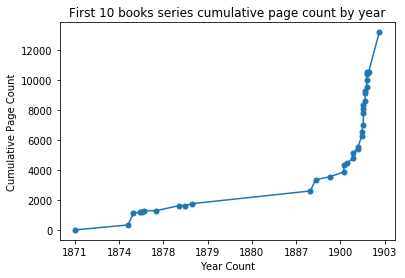

In [51]:
first_series_cumulative_page_count()

## Longest Increasing Subsequence (LIS)

In the following we explore two different solutions for the LIS problem:

- the recursive one does not exploit the solutions to smaller instance by recomputing them at each path in the recursion tree making the overall running time exponential in the worst case
- the dynamic programming on the other hand uses an array to store such partial solutions so that at each step in the computation does not need to recompute them, this reduces the running time to $O(n^2)$

### Recursive implementation

In [81]:
def recursive_LIS_helper(X, i):
    if i == 0:
        return 1
    
    # recursively call only on previous characters that would from an IS
    smaller_precedessors = [j for j in range(i) if X[j] < X[i]]
    
    if len(smaller_precedessors) == 0:
        return 1
    else:
        Y = list(map(lambda j: recursive_LIS_helper(X, j), smaller_precedessors))
        return 1 + max(Y)

def recursive_LIS(X):
    return max(list(map(lambda i: recursive_LIS_helper(X, i), range(len(X)))))

### Running time analysis
Here are the key observations:
- each recursive call of the `recursive_LIS_help()` function makes $O(n)$ operations due to the `filter()` function that finds indices of characters preceding the current one
- in the worst case scenario characters are in alphabetical order and at each recursive call the vector `small_predecessor` contains all the characters but the current one, so we make $n-1$ recursive call of size $1,2, \dots ,n-1$

Let $f(n)$ be the number of nodes in the recursive tree on input $n$, we can write that:

$$f(n) = 1 + \sum_{i=1}^{n-1} f(i)$$

We prove that $f(n) = O\big(2^{n-1}\big)$ by induction on $n$.

The case $n=1$ is trivial. So suppose the claim to be true $\forall k < n$, we have:

$$
\begin{align}
    f(n) &= 1 + \sum_{i=1}^{n-1} f(i)\\
         &= 1 + \sum_{i=1}^{n-1} 2^{i-1}\\
         &= 1 + \sum_{i=0}^{n-2} 2^i\\
         &= 1 + \big(2^{n-1} - 1\big)\\
         &= 2^{n-1}
\end{align}
$$

Since we make $O(n)$ operation at each node, the total running time is clearly exponential.



The main issue with this implementation is that we don't exploit the solution on subsequences but recompute them several times within different branch of the recursive calls. An instance of which the algorithms perform bad is when the characters are sorted which implies a recursive for all `i < n` where `n` is the size of the current instance.


Here's a simple example that would not run in reasonable time.

In [78]:
s = "ABCDEFGHIJKLMNOPQRSTUVZ"
#recursive_LIS(s * 3)

### Dynamic Programming implementation

We can use a simple array to store the results sliding incrementally through the string and using the values previously computed.

In [80]:
def dynamic_LIS(X):
    n = len(X)
    
    if n == 1:
        return 1
    
    V = [1]*n
    
    for i in range(1,n):       
        for j in range(i):
            if X[j] < X[i] and V[j]+1 > V[i]:
                V[i] = V[j] + 1
    
    return max(V)

### Running time analysis

The analysis here is quite trivial:
- the nested `for` runs $O(n^2)$ iteration in total
- the `if` inside the nested `for` takes $O(1)$
- `len()` and `max()` outside the `for` take $O(n)$

so the total running time is $O(n^2)$.

### Correctness of the formula

The proof is by induction on the number of characters $n$.

For $n=1$ we're looking at the first character and so we apply the second formula as there's $j$ to look at, and the value is correctly 1.


Suppose the formula holds for every $k < n$, then by hypothesis $X[j]$ is the length of the LIS of the string $S[1]\dots S[j]$, so if we take the maximum value among the $X[j]$ s.t. $S[j] < S[n]$ and sum 1 we have the length of the LIS of the string $S[1] \dots S[n]$.